# Investing On ETFs Using The Kelly Formula Part 1

## How To Retrieve ETF Data Using Python 

## Introduction
The investor's main problem is identifying profitable trading strategies.
He could deploy fundamental, technical and quantitative techniques to pick winning trading systems.
The investor's next problem is how to allocate capital to these different profit-generating trading strategies.

In this article, setting Exchange Traded Funds (ETFs) as potentially profitable strategies, I will demonstrate how to retrieve relevant ETF data. I will source Vanguard ETFs list from the Vanguard website using Python package Selenium. I will use the list to pull historical Open-High-Low-Close-Volume(OHCLV) data using Python package pandas-datareader.

## Exchange Traded Fund (ETF)
ETFs are traded on major stock exchanges like the New York Stock Exchange and Nasdaq.
You can buy and sell them using online brokers such as TD Ameritrade or Interactive Brokers.
An ETF is a composed of tens or hundreds of stocks (or bonds) in a single fund.
ETFs are popular because they provide the following:
1. Low costs: Average expense ratio of 0.27% per year.
2. Diversification: Buying SPY (ETF on S&P 500 index) vs TSLA.
3. Alternative investment themes: Gain exposure on water resources companies or solar technology firms.

## Vanguard
Vanguard was established in 1975 by John Bogle, the father of passive investing. It specializes in low-cost investing, and offers both indexed and actively managed funds. Vanguard has USD 5.2 trillion of assets under management as of January 2019.

## Vanguard ETFs

## Retrieve Vanguard ETFs Data
1. Source Vanguard ETFs list of tickers.
2. Source Vanguard ETFs historical OHLCV data.

## Source Vanguard ETFs List Of Tickers
In this section, we retrieve tickers of every ETF on Vanguard's website.
We use Selenium, a web browser automation tool, to help us retrieve the ETF tickers.
We propose two approaches, direct and indirect, of sourcing ETF ticker data from website.

### Selenium
[Selenium](https://www.seleniumhq.org) automates web browsers.
Selenium was initially conceived for automation of web application testing.
It allows you to open a browser and automate actions like clicking buttons and completing forms.

I propose two ways of using Selenium scrape of ETF ticker data:
1. An automated approach: We automate navigation of Vanguard's web site by going from the home page to the ETF list page containing the tickers.
2. A non-automated approach: We go directly to the ETF list page containing the tickers.

Import packages

In [1]:
import pandas as pd
from pandas import Series, DataFrame
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
import pandas_datareader as web
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

### Automated Approrach
Code for scraping ETF tickers from Vanguard's home page using the first approach.

In [2]:
# # Option
# option = webdriver.ChromeOptions()
# option.add_argument('--incognito')


# # Create a Chrome webdriver 
# driver = webdriver.Chrome('/Applications/chromedriver', options=option)

# # Get to the Vanguard home page
# driver.get('https://investor.vanguard.com/home/')

# # Set delay in seconds
# delay = 10 


# # Head to the next page by clicking on 'Investing'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Investing')))
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# driver.find_element_by_link_text('Investing').click()


# # Head to the next page by clicking on 'Vanguard ETFs'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Vanguard ETFs')))
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# driver.find_element_by_link_text('Vanguard ETFs').click()

# # Head to the next page by clicking on 'Browse a list of Vanguard ETFs'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Browse a list of Vanguard ETFs')))
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# driver.find_element_by_partial_link_text('Browse a list of Vanguard ETFs').click()


# # Source the Vanguard ETF names and tickers
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'productEntry')))
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# content = driver.find_elements_by_class_name('productEntry')

### Non-automated Approach
Code for scraping ETF tickers from Vanguard's ETF list page.

In [3]:
# Option
option = webdriver.ChromeOptions()
option.add_argument('--incognito')

# Create a Chrome webdriver 
driver = webdriver.Chrome('/Applications/chromedriver', options=option)

# Get to the Vanguard ETF list page
driver.get('https://investor.vanguard.com/etf/list#/etf/asset-class/month-end-returns')

# Set delay in seconds
delay = 10

try:
    WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'productEntry')))
    # Source the Vanguard ETF names and tickers
    content = driver.find_elements_by_class_name('productEntry')
except TimeoutException:
    print("Timed out waiting for page to load.")
    driver.quit()

### Vanguard ETFs

Inspect the content collected

In [4]:
len(content)

118

In [5]:
for i in content:
    print(i.text)














Total Corporate Bond ETF
Vanguard Select Funds
Tax-Exempt Bond ETF
Dividend Appreciation ETF
ESG U.S. Stock ETF
Growth ETF
High Dividend Yield ETF
Large-Cap ETF
Mega Cap ETF
Mega Cap Growth ETF
Mega Cap Value ETF
Vanguard Select Funds
S&P 500 ETF
Vanguard Select Funds
Total Stock Market ETF
Value ETF
Vanguard Select Funds
Extended Market ETF
Mid-Cap ETF
Mid-Cap Growth ETF
Mid-Cap Value ETF
Small-Cap ETF
Small-Cap Growth ETF
Small-Cap Value ETF
Total World Bond ETF
Vanguard Select Funds
Total International Bond ETF
Emerging Markets Government Bond ETF
Total World Stock ETF
ESG International Stock ETF
FTSE All-World ex-US ETF
FTSE All-World ex-US Small-Cap ETF
Vanguard Select Funds
FTSE Developed Markets ETF
FTSE Europe ETF
FTSE Pacific ETF
Global ex-U.S. Real Estate ETF
International Dividend Appreciation ETF
International High Dividend Yield ETF
Vanguard Select Funds
Total International Stock ETF
Vanguard Select Funds
FTSE Emerging Markets ETF
Communication Services ETF
Co

VAW Stock - Sector 0.10% $124.10 $1.25
increased
1.01%
increased
2.13%B
30 day
5/31/2019 12.52% -11.39% 3.11% 9.92% 7.70% (01/26/2004)
VNQ Stock - Sector 0.12% $88.70 $0.08
increased
0.09%
increased
note 19.76% 14.91% 7.58% 14.92% 8.72% (09/23/2004)
VPU Stock - Sector 0.10% $134.47 $0.72
increased
0.54%
increased
3.21%B
30 day
5/31/2019 14.98% 17.11% 10.36% 12.69% 10.07% (01/26/2004)


We notice the following structure:
1. Elements 0-58 are the names of the ETFs.
2. Elements 59-118 are the tickers, asset class, etc. of the ETFs.

Create lists to hold ETF names and tickers

In [6]:
# Initialize the lists
etf_names = []
etf_tickers = []

for i in range(0, 59):
    # Get the names
    try:
        etf_names.append(content[i].text.split('\n')[1])
    except IndexError:
        etf_names.append(content[i].text)
    
    # Get the tickers
    etf_tickers.append(content[i + 59].text.split()[0])

Create a DataFrame mapping an ETF's name to it's ticker

In [7]:
etf_map = pd.DataFrame({'Name': etf_names,
                        'Ticker': etf_tickers})

### Vanguard ETFs By Group
Create a DataFrame mapping an ETF's name to it's ticker by group
1. US Bonds ETFs
2. US Stocks ETFs
3. Internationals Bond ETFs
4. Internationals Stock ETFs
5. Sectors ETFs

In [8]:
# ETF maps by group
etf_us_bonds_map = etf_map.iloc[0:15]
etf_us_stocks_map = etf_map.iloc[15:33]
etf_intl_bonds_map = etf_map.iloc[33:36]
etf_intl_stocks_map = etf_map.iloc[36:48]
etf_sectors_map = etf_map.iloc[48:]

## Source Vanguard ETFs Historical OHLCV Data

Set the parameters
1. Source is set to the Investors Exchange.
2. Start and end date is set to 5 years from today.

In [13]:
source = 'iex'
start = '2014-01-01'
end = '2020-01-01'

### Vanguard ETFs

Pull historical OHLCV data from the Investors Exchange

In [14]:
# List of tickers
etf_list = etf_map['Ticker'].tolist()

# Initialize data
etf_data = web.DataReader(etf_list[0], source, start, end)
# Conver index to datetime
etf_data.index = pd.to_datetime(etf_data.index)

for i in range(1, len(etf_list)):
    # Pull new data
    temp_data = web.DataReader(etf_list[i], source, start, end)
    
    # Update data
    etf_data = pd.concat([etf_data, temp_data], axis=1, sort=True)
    
# Set multi-level columns
etf_data.columns = pd.MultiIndex.from_product([etf_list, temp_data.columns])

Inspect

In [15]:
etf_data.head()

EDV                                        BIV           \
               open     high      low    close volume     open     high   
date                                                                      
2014-06-09  85.4117  85.5767  85.0727  85.2873  25658  72.1914  72.1914   
2014-06-10  84.8229  85.1877  84.6819  84.8478  18255  72.0456  72.0799   
2014-06-11  85.3252  85.4117  84.5078  85.2044  93263  72.0370  72.1399   
2014-06-12  85.2790  86.4896  84.7732  86.2077  34454  72.1485  72.3372   
2014-06-13  85.6853  86.9375  85.6853  86.2824  36060  72.0456  72.2427   

                                      ...        VNQ                    \
                low    close  volume  ...       open     high      low   
date                                  ...                                
2014-06-09  72.0658  72.1571  184685  ...    61.5098  61.6471  60.5892   
2014-06-10  71.9684  72.0541  400619  ...    60.6538  60.7184  60.0320   
2014-06-11  72.0031  72.0970  172010  ...    60.0078  60.3470  59.7930   
2014-06-12  72.0884  72.3372  325751  ...    60.0805  60.1289  59.4764   
2014-06-13  72.0371  72.1999  156542  ...    59.9351  60.1855  59.5394   

                                  VPU                                    
              close   volume     open     high      low    close volume  
date                                                                     
2014-06-09  60.7023  2468057  79.7072  79.9363  79.2404  79.3507  75050  
2014-06-10  60.2501  2614973  79.3252  79.5289  78.9772  79.1131  83998  
2014-06-11  60.0885  2365893  78.8160  78.9772  78.1879  78.1879  94691  
2014-06-12  59.9351  2249588  78.0776  78.5698  77.2797  78.4256  96214  
2014-06-13  60.0885  1853138  78.2643  78.9518  78.0521  78.8499  99422  

[5 rows x 295 columns]

In [16]:
etf_data.tail()

EDV                                          BIV           \
              open      high       low   close  volume     open     high   
date                                                                       
2019-05-31  125.77  127.0600  125.5000  126.86  219580  84.9553  85.2011   
2019-06-03  127.28  128.0990  126.7700  127.94  297379  85.3200  85.5500   
2019-06-04  126.69  127.0600  125.4438  125.85  229388  85.3000  85.4620   
2019-06-05  125.13  125.5000  124.4900  124.60  301695  85.5100  85.6400   
2019-06-06  125.85  126.5848  124.8075  125.26  137576  85.4600  85.5350   

                                       ...       VNQ                       \
                low    close  volume   ...      open   high    low  close   
date                                   ...                                  
2019-05-31  84.8690  85.1947  837244   ...     86.16  87.37  85.89  86.89   
2019-06-03  85.2100  85.4400  742114   ...     87.20  87.39  86.48  87.10   
2019-06-04  85.1937  85.3500  948156   ...     87.25  87.25  85.95  86.71   
2019-06-05  85.3800  85.4700  606893   ...     87.21  88.62  86.99  88.52   
2019-06-06  85.3200  85.4000  572499   ...     88.80  88.89  88.05  88.69   

                        VPU                                       
             volume    open      high       low   close   volume  
date                                                              
2019-05-31  5369175  128.78  129.8122  128.3900  129.58   194260  
2019-06-03  6347789  130.04  131.1100  129.4694  130.95   170834  
2019-06-04  6993156  131.22  131.2200  128.7500  131.14   153337  
2019-06-05  6775425  131.67  134.1402  131.2348  133.75   243189  
2019-06-06  4077190  133.91  134.7300  133.6399  134.52  1183343  

[5 rows x 295 columns]

### Vanguard ETFs By Group

Create DataFrame objects containing close prices of ETFs by group.

In [62]:
# Create list of Vanguard ETF groups
groups = ['us bonds',
          'us stocks',
          'intl bonds',
          'intl stocks',
          'sectors']

# Create a dictionary of Vanguard ETF maps
maps = {'us bonds': etf_us_bonds_map,
        'us stocks': etf_us_stocks_map,
        'intl bonds': etf_intl_bonds_map,
        'intl stocks': etf_intl_stocks_map,
        'sectors': etf_sectors_map}

# Initialize Vanguard ETF close dictionary
close = {'us bonds': pd.DataFrame(),
         'us stocks': pd.DataFrame(),
         'intl bonds': pd.DataFrame(),
         'intl stocks': pd.DataFrame(),
         'sectors': pd.DataFrame()}

# Update Vanguard ETF close dictionary
for i in groups:
    # Set tickers
    tickers = maps[i]['Ticker'].tolist()
     
    res = {}
    for j in range(len(tickers)):
        res[tickers[j]] = etf_data[tickers[j]].close
        
    # Update close prices 
    close[i] = pd.DataFrame(res)

### Vanguard US Bond ETFs

In [63]:
etf_us_bonds_close = close['us bonds']

Inspect

In [64]:
etf_us_bonds_close.head()

,EDV,BIV,VGIT,BLV,VGLT,VMBS,BSV,VTIP,VGSH,BND,VCIT,VCLT,VCSH,VTC,VTEB
date,,,,,,,,,,,,,,,
2014-06-09,85.2873,72.1571,58.2021,72.6104,60.9774,46.7313,73.6911,47.1979,57.5302,71.5821,72.6763,71.7626,71.6871,NaN,NaN
2014-06-10,84.8478,72.0541,58.1241,72.4955,60.6236,46.7001,73.6452,47.1790,57.4830,71.4421,72.5748,71.5531,71.7497,NaN,NaN
2014-06-11,85.2044,72.0970,58.1717,72.4955,60.7983,46.7002,73.6636,47.2074,57.4925,71.4683,72.5664,71.4241,71.7676,NaN,NaN
2014-06-12,86.2077,72.3372,58.3027,72.9509,61.2526,46.7804,73.7095,47.2736,57.5397,71.6522,72.7439,71.9479,71.7766,NaN,NaN
2014-06-13,86.2824,72.1999,58.2387,72.9960,61.3021,46.7268,73.6636,47.2263,57.5113,71.6347,72.6340,71.9076,71.7676,NaN,NaN


In [65]:
etf_us_bonds_close.tail()

,EDV,BIV,VGIT,BLV,VGLT,VMBS,BSV,VTIP,VGSH,BND,VCIT,VCLT,VCSH,VTC,VTEB
date,,,,,,,,,,,,,,,
2019-05-31,126.86,85.1947,65.3486,94.5163,80.8402,52.4738,79.972,49.18,60.6556,82.0465,87.7986,92.8723,79.9126,NaN,NaN
2019-06-03,127.94,85.4400,65.5900,95.0400,81.3500,52.6000,80.190,49.23,60.7600,82.2800,88.0600,93.1300,80.1200,NaN,NaN
2019-06-04,125.85,85.3500,65.4500,94.5400,80.4600,52.5600,80.130,49.26,60.7200,82.1400,88.0900,92.9400,80.0400,NaN,NaN
2019-06-05,124.60,85.4700,65.5000,94.1500,80.0200,52.5200,80.210,49.30,60.7700,82.1400,88.1400,92.7700,80.1300,NaN,NaN
2019-06-06,125.26,85.4000,65.4400,94.5000,80.2700,52.5300,80.120,49.28,60.7200,82.1200,88.1300,93.0400,80.0900,NaN,NaN


VTC and VTEB close prices are NaNs, we drop these funds.

In [66]:
etf_us_bonds_close.drop(['VTC', 'VTEB'], axis='columns', inplace=True)

### Vanguard US Stock ETFs

In [67]:
etf_us_stocks_close = close['us stocks']

Inspect

In [68]:
etf_us_stocks_close.head()

,VIG,ESGV,VUG,VYM,VV,MGC,MGK,MGV,VOO,VTI,VTV,VXF,VO,VOT,VOE,VB,VBK,VBR
date,,,,,,,,,,,,,,,,,,
2014-06-09,70.5671,NaN,92.2458,56.7853,81.4257,60.3317,71.4322,51.3225,162.0653,92.0582,71.4204,80.3828,108.9336,91.5871,77.4734,106.5577,118.3656,94.3188
2014-06-10,70.4321,NaN,92.1614,56.8624,81.3985,60.3948,71.4229,51.3577,162.1015,92.0400,71.4733,80.2433,108.6002,91.2321,77.2667,106.3448,118.0511,94.1651
2014-06-11,70.0811,NaN,92.0676,56.6140,81.1266,60.1781,71.3388,51.1467,161.5770,91.7313,71.1296,79.9828,108.2390,91.1457,76.8441,105.9931,117.8034,93.7221
2014-06-12,69.5502,NaN,91.2609,56.2715,80.5827,59.7627,70.6379,50.7774,160.3744,91.0774,70.6714,79.4990,107.5091,90.5219,76.4035,105.3637,117.2411,93.1253
2014-06-13,69.6492,NaN,91.4579,56.5027,80.8184,59.9253,70.7875,51.0587,160.8808,91.3771,70.9886,79.7502,107.9332,90.7654,76.7002,105.7062,117.6700,93.3694


In [69]:
etf_us_stocks_close.tail()

,VIG,ESGV,VUG,VYM,VV,MGC,MGK,MGV,VOO,VTI,VTV,VXF,VO,VOT,VOE,VB,VBK,VBR
date,,,,,,,,,,,,,,,,,,
2019-05-31,108.45,NaN,153.40,82.53,126.47,95.23,121.63,75.80,252.87,140.69,104.21,111.32,156.62,140.63,103.83,146.92,173.78,122.88
2019-06-03,108.71,NaN,151.09,83.43,126.05,94.81,119.48,76.42,252.12,140.41,105.20,111.30,157.00,139.85,105.01,147.23,172.70,124.12
2019-06-04,110.73,NaN,154.70,84.98,128.83,96.84,122.35,77.91,257.67,143.56,107.30,114.16,160.39,143.04,107.28,150.88,177.26,127.12
2019-06-05,112.07,NaN,156.30,85.44,129.98,97.67,123.66,78.47,259.85,144.66,107.96,114.62,161.93,144.68,108.01,151.40,178.53,127.16
2019-06-06,112.72,NaN,157.51,86.00,130.77,98.31,124.52,78.90,261.54,145.47,108.63,114.78,162.81,145.49,108.60,151.57,178.89,127.16


ESGV close prices are NaNs, we drop this fund.

In [70]:
etf_us_stocks_close.drop('ESGV', axis='columns', inplace=True)

### Vanguard International Bond ETFs

In [71]:
etf_intl_bonds_close = close['intl bonds']

Inspect

In [72]:
etf_intl_bonds_close.head()

,BNDW,BNDX,VWOB
date,,,
2014-06-09,NaN,46.3448,64.2825
2014-06-10,NaN,46.3176,64.2785
2014-06-11,NaN,46.2723,64.0600
2014-06-12,NaN,46.3357,63.9766
2014-06-13,NaN,46.3538,63.9528


In [73]:
etf_intl_bonds_close.tail()

,BNDW,BNDX,VWOB
date,,,
2019-05-31,NaN,56.4157,77.8393
2019-06-03,NaN,56.4600,77.8600
2019-06-04,NaN,56.5200,78.1200
2019-06-05,NaN,56.6100,78.3700
2019-06-06,NaN,56.6700,78.6400


BNDW close prices are NaNs, we drop this fund.

In [74]:
etf_intl_bonds_close.drop('BNDW', axis='columns', inplace=True)

### Vanguard International Stock ETFs

In [75]:
etf_intl_stocks_close = close['intl stocks']

Inspect

In [76]:
etf_intl_stocks_close.head()

,VT,VSGX,VEU,VSS,VEA,VGK,VPL,VNQI,VIGI,VYMI,VXUS,VWO
date,,,,,,,,,,,,
2014-06-09,55.5631,NaN,45.7248,97.0180,37.2796,52.4239,54.1739,47.6874,NaN,NaN,47.3649,38.2228
2014-06-10,55.5186,NaN,45.6988,96.9830,37.2105,52.3899,53.9459,47.3848,NaN,NaN,47.3303,38.3717
2014-06-11,55.3227,NaN,45.5170,96.4246,37.0376,52.0493,53.8933,47.1641,NaN,NaN,47.1573,38.2403
2014-06-12,55.1091,NaN,45.4997,96.7475,37.0462,52.0153,53.8583,47.0823,NaN,NaN,47.1400,38.0651
2014-06-13,55.2604,NaN,45.5516,96.6253,37.0376,51.9387,54.0336,47.1395,NaN,NaN,47.2005,38.2053


In [77]:
etf_intl_stocks_close.tail()

,VT,VSGX,VEU,VSS,VEA,VGK,VPL,VNQI,VIGI,VYMI,VXUS,VWO
date,,,,,,,,,,,,
2019-05-31,71.19,NaN,48.72,101.08,39.84,52.55,63.34,57.46,NaN,NaN,50.45,40.64
2019-06-03,71.30,NaN,49.07,101.11,40.00,52.92,63.60,57.72,NaN,NaN,50.76,40.88
2019-06-04,72.52,NaN,49.49,102.32,40.52,53.59,64.26,58.12,NaN,NaN,51.26,40.89
2019-06-05,72.77,NaN,49.43,102.31,40.50,53.57,64.20,57.91,NaN,NaN,51.14,40.59
2019-06-06,73.11,NaN,49.61,102.40,40.67,53.85,64.38,58.20,NaN,NaN,51.26,40.58


VSGX, VIGI, and VYMI close prices are NaNs, we drop these funds.

In [78]:
etf_intl_stocks_close.drop(['VSGX', 'VIGI', 'VYMI'], axis='columns', inplace=True)

### Vanguard Sector ETFs

In [79]:
etf_sectors_close = close['sectors']

Inspect

In [80]:
etf_sectors_close.head()

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
date,,,,,,,,,,,
2014-06-09,74.3313,101.2228,102.4919,120.6412,42.3077,101.9690,96.8294,89.5348,100.1992,60.7023,79.3507
2014-06-10,74.0173,100.9804,102.4654,120.4589,42.2261,102.1834,96.5838,89.7036,100.3441,60.2501,79.1131
2014-06-11,73.7660,100.7100,102.1572,120.9276,41.9468,102.1368,95.7923,89.6098,99.8913,60.0885,78.1879
2014-06-12,73.2093,99.4362,101.4614,121.4008,41.7458,101.6054,94.4731,88.8409,99.0038,59.9351,78.4256
2014-06-13,73.8089,99.5073,101.4878,122.6118,41.7458,101.5308,94.7460,89.4035,99.4385,60.0885,78.8499


In [81]:
etf_sectors_close.tail()

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
date,,,,,,,,,,,
2019-05-31,83.57,166.90,142.66,78.77,65.15,163.34,135.23,194.46,115.16,86.89,129.58
2019-06-03,81.39,165.59,144.50,79.87,65.63,163.89,136.09,190.92,118.44,87.10,130.95
2019-06-04,83.09,170.22,145.78,81.31,67.45,167.00,139.63,197.26,122.15,86.71,131.14
2019-06-05,83.15,171.09,147.27,80.19,67.76,168.02,140.89,199.81,122.77,88.52,133.75
2019-06-06,83.43,171.70,148.60,81.49,67.98,168.21,140.98,202.02,124.10,88.69,134.52


### Plot Of Vanguard ETFs By Group

(735393.0, 737216.0)

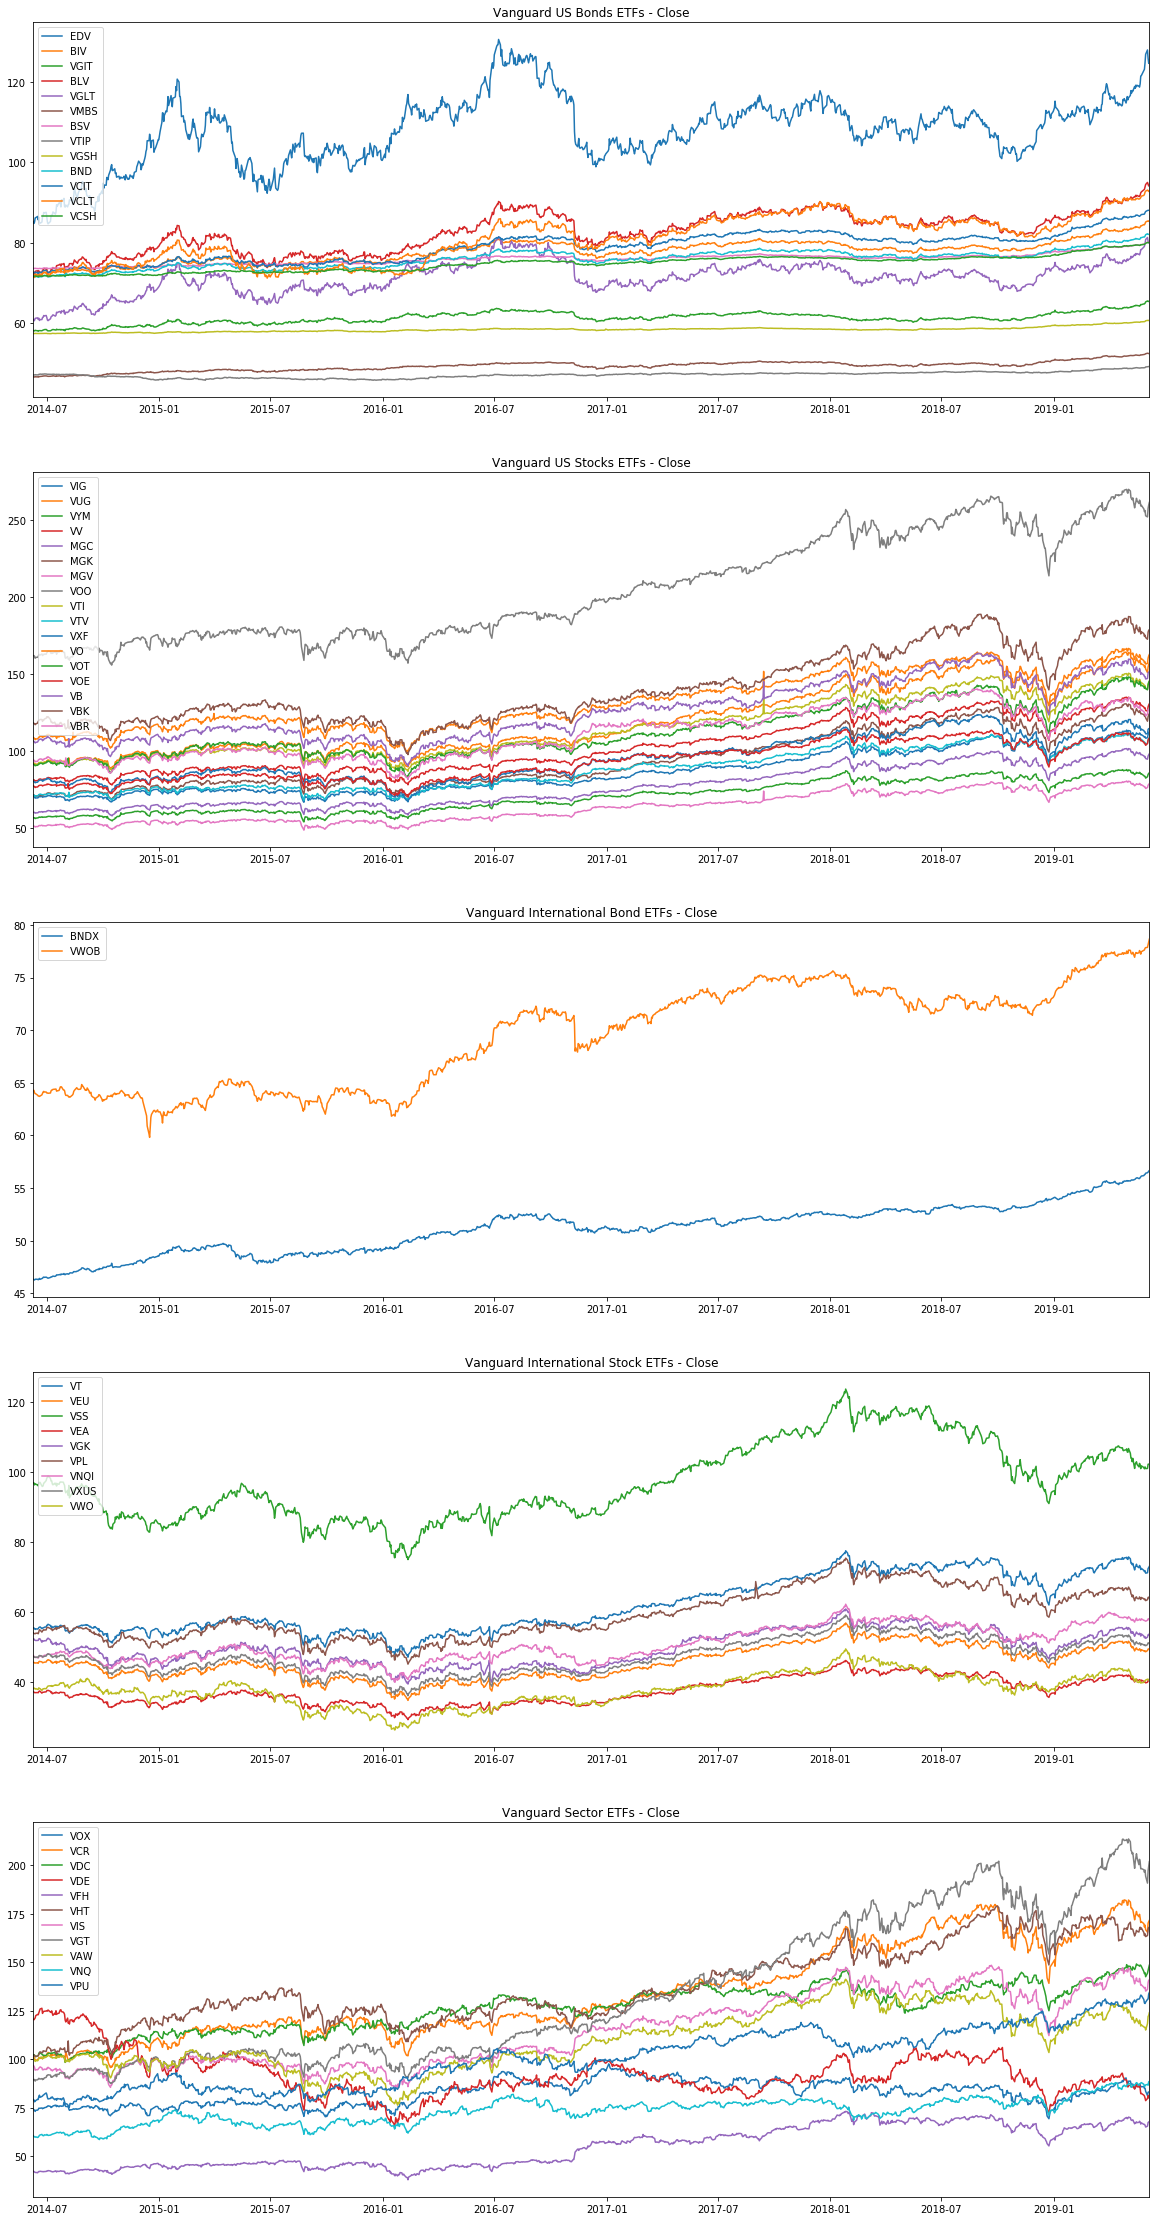

In [82]:
plt.figure(figsize=[20, 40])

# US Bonds
plt.subplot(5, 1, 1)
for i in etf_us_bonds_close.columns.tolist():
    plt.plot(etf_us_bonds_close[i])    
plt.title('Vanguard US Bonds ETFs - Close')
plt.legend(etf_us_bonds_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# US Stocks
plt.subplot(5, 1, 2)
for i in etf_us_stocks_close.columns.tolist():
    plt.plot(etf_us_stocks_close[i])    
plt.title('Vanguard US Stocks ETFs - Close')
plt.legend(etf_us_stocks_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Intl Bonds
plt.subplot(5, 1, 3)
for i in etf_intl_bonds_close.columns.tolist():
    plt.plot(etf_intl_bonds_close[i])    
plt.title('Vanguard International Bond ETFs - Close')
plt.legend(etf_intl_bonds_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Intl Stocks
plt.subplot(5, 1, 4)
for i in etf_intl_stocks_close.columns.tolist():
    plt.plot(etf_intl_stocks_close[i])    
plt.title('Vanguard International Stock ETFs - Close')
plt.legend(etf_intl_stocks_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Sectors
plt.subplot(5, 1, 5)
for i in etf_sectors_close.columns.tolist():
    plt.plot(etf_sectors_close[i])
plt.title('Vanguard Sector ETFs - Close')
plt.legend(etf_sectors_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

## Save The Data

Create a list of output files

In [83]:
output = ['etf_us_bonds.pickle', 
          'etf_us_stocks.pickle', 
          'etf_intl_bonds.pickle', 
          'etf_intl_stocks.pickle', 
          'etf_sectors.pickle']

Create a list of ETF data

In [84]:
data = [etf_us_bonds_close, 
        etf_us_stocks_close,
        etf_intl_bonds_close,
        etf_intl_stocks_close,
        etf_sectors_close]

Pickle

In [85]:
for i in range(len(output)):
    with open(output[i], 'wb') as f:
        pickle.dump(data[i], f)
    
    f.close()

## Conclusion
...